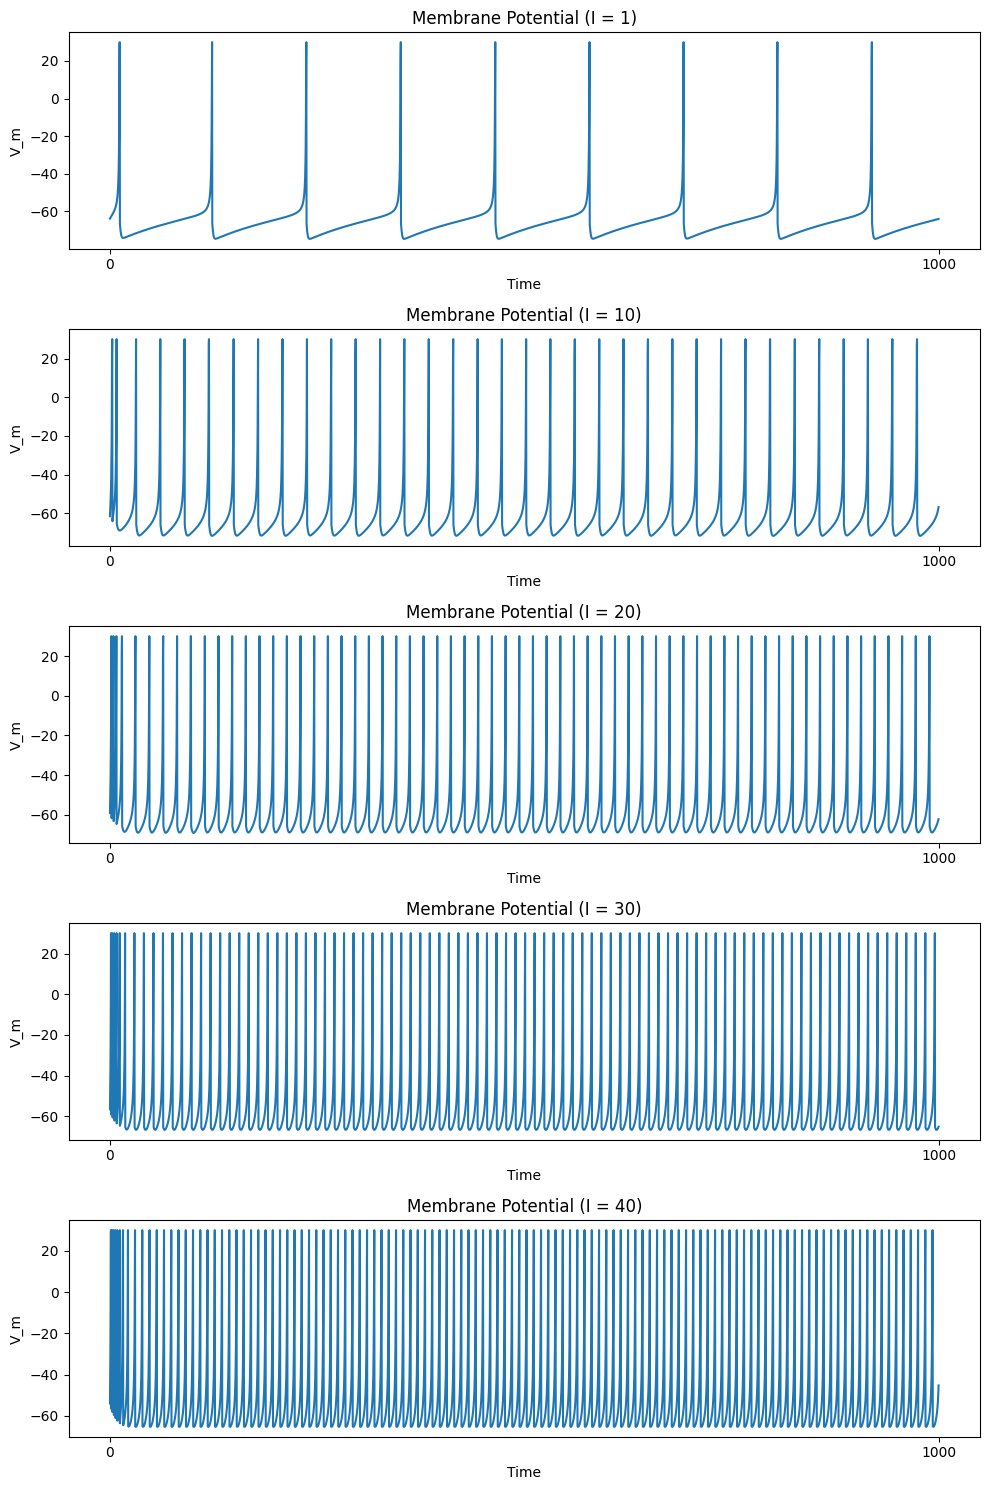

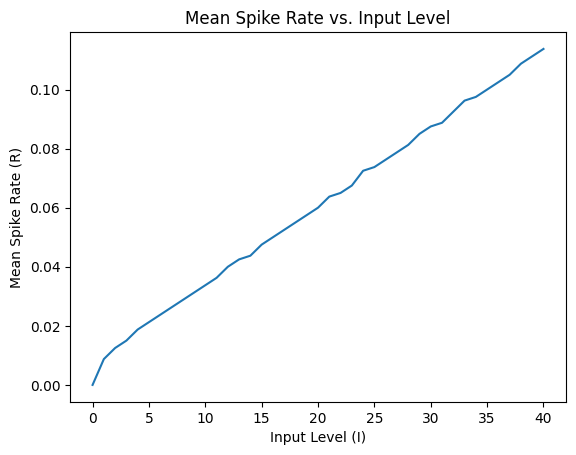

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
a = 0.02
b = 0.25
c = -65
d = 6

# Simulation Settings
steps = 1000
tau = 0.25
tspan = np.arange(0, steps + tau, tau)

# Input Levels
I_values = np.arange(0, 41, 1)

# Initialize Results
R_values = np.zeros(len(I_values))
V_values = []

# Loop Through Input Levels
for i, I in enumerate(I_values):
    # Reset Initial Conditions
    V = -64
    u = b * V
    VV = []
    uu = []
    spike_ts = []

    # Simulate Neuron
    for t in tspan:
        # Constant Input
        V += tau * (0.04 * V**2 + 5 * V + 140 - u + I)
        u += tau * a * (b * V - u)

        # Check for Spike
        if V > 30:
            VV.append(30)
            V = c
            u += d
            spike_ts.append(1)
        else:
            VV.append(V)
            spike_ts.append(0)
        uu.append(u)

    # Calculate Mean Spike Rate
    R_values[i] = np.sum(spike_ts[800:]) / 800

    # Store Membrane Potential Time-Series
    V_values.append(VV)

# Plot Membrane Potential Time-Series
fig, axs = plt.subplots(5, 1, figsize=(10, 15))
for i, ax in enumerate(axs):
    ax.plot(tspan, V_values[[1, 10, 20, 30, 40][i]])
    ax.set_title(f'Membrane Potential (I = {I_values[[1, 10, 20, 30, 40][i]]})')
    ax.set_xlabel('Time')
    ax.set_ylabel('V_m')
    ax.set_xticks([0, max(tspan)])
    ax.set_xticklabels([0, steps])
plt.tight_layout()
plt.show()

# Plot Mean Spike Rate vs. Input Level
plt.plot(I_values, R_values)
plt.title('Mean Spike Rate vs. Input Level')
plt.xlabel('Input Level (I)')
plt.ylabel('Mean Spike Rate (R)')
plt.show()